In [ ]:
import numpy as np
import dlib
import cv2
import h5py
from pathlib import Path
import matplotlib.pyplot as plt
import sys

In [8]:
data_dir = Path('/media/netanel/Backup/Image Processing Course Project/data/raw')
filepath = Path('/media/netanel/Backup/Image Processing Course Project/data/raw/P1LC7/P1LC7_edited.avi')

In [29]:
def get_first_frame(filepath):
    path = str(filepath)
    cap = cv2.VideoCapture(path)
    ret, frame = cap.read()
    frame = frame[..., [2, 1, 0]] # bgr to rgb
    return frame

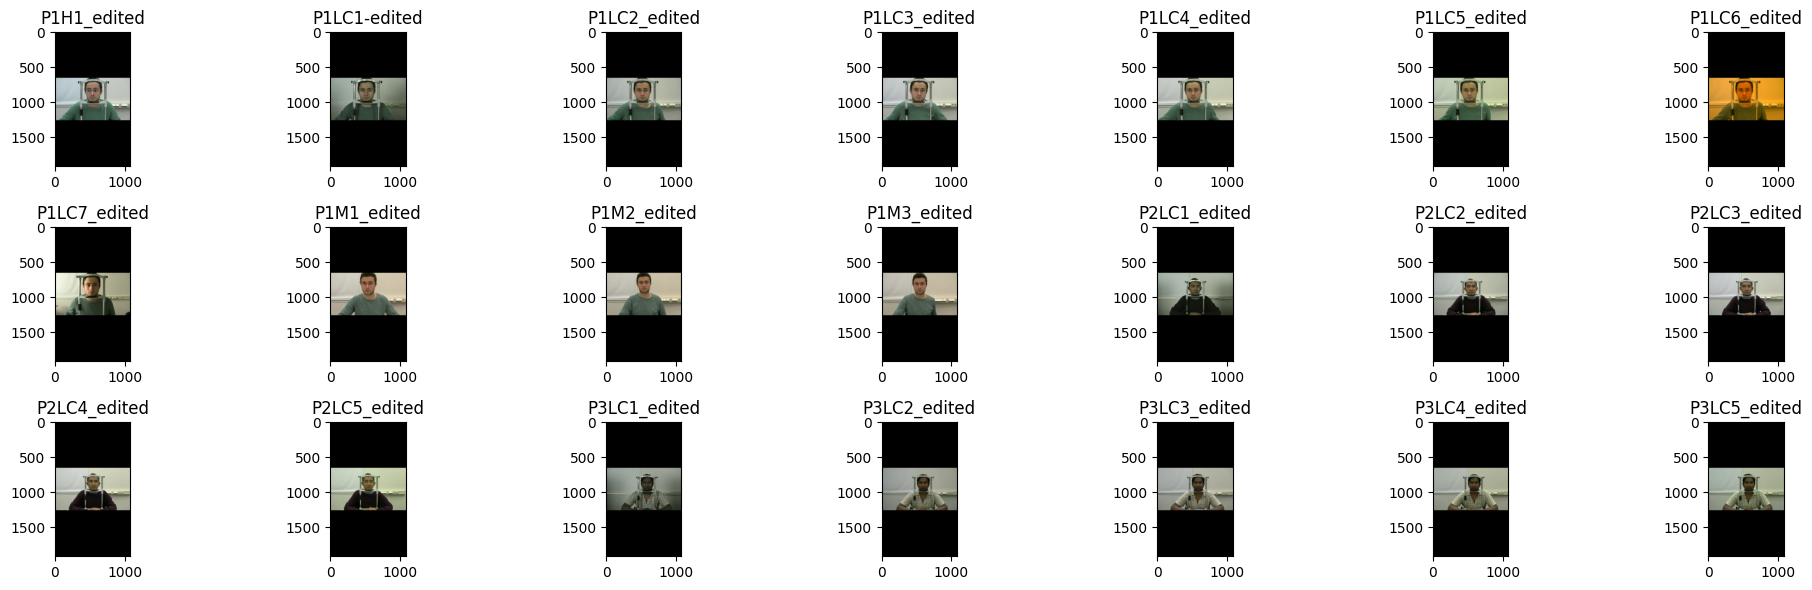

In [30]:
fig, axs = plt.subplots(3, 7, figsize=(20, 6))
axs = axs.ravel()
dirs = [d for d in data_dir.glob('*')]
files = []
for d in dirs:
    file = d / f'{d.name}_edited.avi'
    if not Path.exists(file):
        file = d / f'{d.name}-edited.avi'
    files.append(file)

for file, ax in zip(files, axs):
    ax.imshow(get_first_frame(file))
    ax.set_title(file.name[:-4])
plt.tight_layout()
plt.show()

Crop general face area to save time

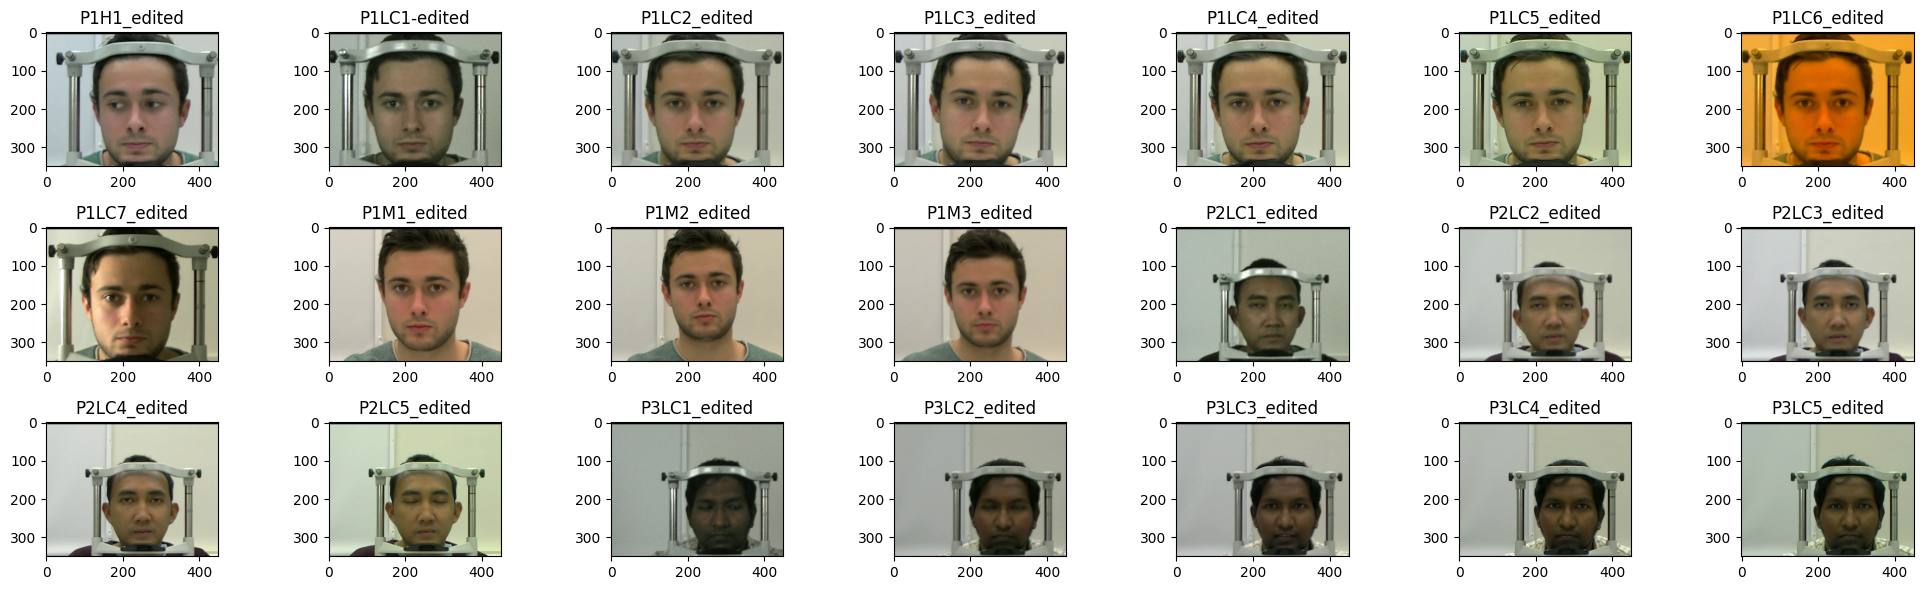

In [36]:
fig, axs = plt.subplots(3, 7, figsize=(20, 6))
axs = axs.ravel()

for file, ax in zip(files, axs):
    ax.imshow(get_first_frame(file)[650:1000, 300:750, :])
    ax.set_title(file.name[:-4])
plt.tight_layout()
plt.show()

In [37]:
def avi2numpy(filepath: Path) -> np.ndarray:
    path = str(filepath)
    cap = cv2.VideoCapture(path)
    frames = []
    while True:
        ret, frame = cap.read()
        if ret:
            frames.append(frame.copy()[650:1000, 300:750, [2, 1, 0]])
        else:
            break
    return np.array(frames)

In [38]:
test_array = avi2numpy(files[0])

In [ ]:
sys.getsizeof(test_array)

In [ ]:

def crop_face(frames: np.ndarray) -> np.ndarray:
    pass

In [5]:
avi2numpy(filepath)